# Perceptrons

In [1]:
import numpy as np
import matplotlib.pyplot as plt

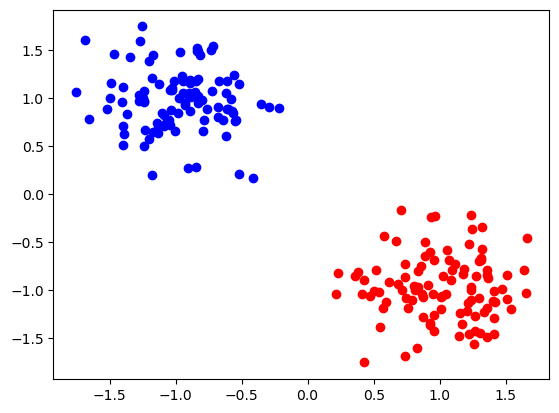

In [2]:
a_samples = np.random.multivariate_normal([-1, 1], [[0.1, 0], [0, 0.1]], 100)
b_samples = np.random.multivariate_normal([1, -1], [[0.1, 0], [0, 0.1]], 100)
a_targets = np.ones(100) * -1  # Samples from class A are assigned a class value of -1.
b_targets = np.ones(100)  # Samples from class B are assigned a class value of 1.

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(a_samples[:, 0], a_samples[:, 1], c='b')
ax.scatter(b_samples[:, 0], b_samples[:, 1], c='r')

In [3]:
def p_step(x):
    """Original Perceptron step function."""
    out = x.copy()
    out[x < 0] = -1
    out[x >= 0] = 1
    return out


def dot(w, x):
    x_bias = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    return w @ x_bias.T


def calc_decision_boundary(weights):
    """Compute decision boundary given the parameters.
    Assumes the bias parameter is the first weight."""
    x = -weights[0] / weights[1]
    y = -weights[0] / weights[2]
    m = -y / x
    return np.array([m, y])


def p_loss(predictions, targets):
    """Original Perceptron loss formulation."""
    
    # The original loss only considered misclassifications
    predictions[targets == predictions] = 0
    
    return -np.dot(predictions, targets)


def p_update(weights, sample, prediction, target, eta=1):
    """Original Perceptron update step."""
    
    if prediction == target:
        return weights
    
    x_bias = np.insert(sample, 0, 1)

    w_update = weights + eta * x_bias * target

    return w_update

In [4]:
# Weight Initialization
weights = np.random.uniform(-1, 1, size=(3,))
print("Weights: {}".format(weights))

Weights: [ 0.71175396 -0.62819193 -0.81386558]


In [5]:
# Forward pass -- use input from the blue distribution centered at (-1, 1)
x = np.array([[-1.0, 1.0]])
y = dot(weights, x)
print("Before step function: {}".format(y[0]))

# Step function
out = p_step(y)
print("Final prediction: {}".format(out[0]))

Before step function: 0.526080311763204
Final prediction: 1.0


Slope: -0.7718620182790793
Y-Intercept: 0.8745350371787959


(-2.0, 2.0)

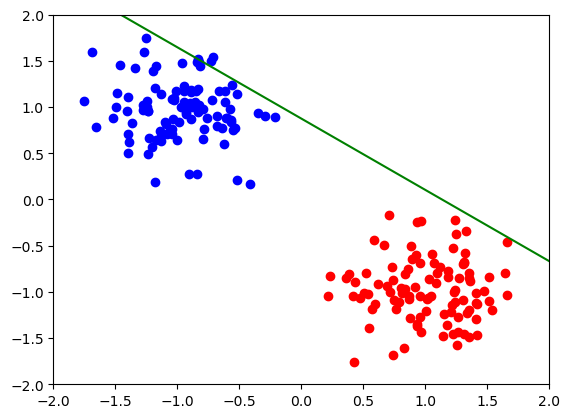

In [6]:
# Classifier Parameters
# print(weights)
# weights = np.array([0.1, -0.91290713, -0.19996809]) 

# For visualizing the line
m, b = calc_decision_boundary(weights)
print("Slope: {}\nY-Intercept: {}".format(m, b))

# If the slope is undefined, it is vertical.
if weights[2] != 0:
    x = np.linspace(-3, 3, 100)
    y = m * x + b
else:
    x = np.zeros(100)
    y = np.linspace(-3, 3, 100) + b
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='g')
ax.scatter(a_samples[:, 0], a_samples[:, 1], c='b')
ax.scatter(b_samples[:, 0], b_samples[:, 1], c='r')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

In [7]:
# Step 1: Make a prediction
# Linear combination of weights and input
y_a = dot(weights, a_samples)
y_b = dot(weights, b_samples)

# Step-wise activation function
a_pred = p_step(y_a)
b_pred = p_step(y_b)

# Step 2: Calculate the loss
a_loss = p_loss(a_pred, a_targets)
b_loss = p_loss(b_pred, b_targets)
print("Loss A = {}".format(a_loss))
print("Loss B = {}".format(b_loss))

# Combine and normalize the error between 0 and 1.
# loss = np.concatenate((l1_a, l1_b)).mean()
# print("Normalized loss = {}".format(loss))

Loss A = 97.0
Loss B = -0.0


# Update Weights

In [8]:
i = 0
samples = np.concatenate((a_samples, b_samples))
pred = np.concatenate((a_pred, b_pred))
targets = np.concatenate((a_targets, b_targets))

Slope: 1.0143945315025575
Y-Intercept: 0.003647213738342583
Loss = -0.0


(-2.0, 2.0)

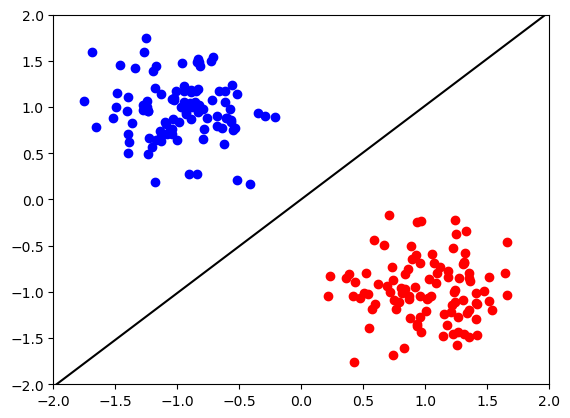

In [9]:
# Classifier Parameters
# print(weights)

# Step 3: Update the weights
for i in range(pred.shape[0]):
    weights = p_update(weights, samples[i], pred[i], targets[i])

# Classifier Parameters
# print(weights)

# For visualizing the line
m, b = calc_decision_boundary(weights)
print("Slope: {}\nY-Intercept: {}".format(m, b))

y = dot(weights, samples)

# Step-wise activation function
pred = p_step(y)
loss = p_loss(pred, targets)
print("Loss = {}".format(loss))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axline([0, b], slope=m, c=[0, 0, 0])
ax.scatter(a_samples[:, 0], a_samples[:, 1], c='b')
ax.scatter(b_samples[:, 0], b_samples[:, 1], c='r')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

In practice, we implement this to run for $n$ steps before updating.

[ -99.28824604  295.29275633 -292.0288833 ]
Slope: 1.0111765418110061
Y-Intercept: -0.3399946091490817


(-2.0, 2.0)

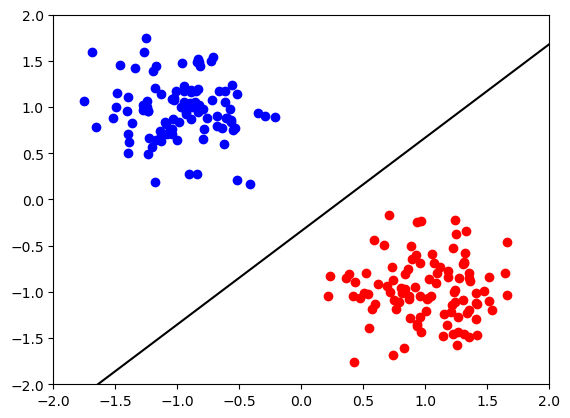

In [10]:
n = 100
for i in range(n):
    y = dot(weights, samples)

    # Step-wise activation function
    pred = p_step(y)
    loss = p_loss(pred, targets)

    weights = p_update(weights, samples[i], pred[i], targets[i])

# Classifier Parameters
print(weights)

# For visualizing the line
m, b = calc_decision_boundary(weights)
print("Slope: {}\nY-Intercept: {}".format(m, b))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axline([0, b], slope=m, c=[0, 0, 0])
ax.scatter(a_samples[:, 0], a_samples[:, 1], c='b')
ax.scatter(b_samples[:, 0], b_samples[:, 1], c='r')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])